Copy-paste-modified from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
print('Neighbourhoods: ' + ', '.join(set(df_train['Neighborhood'].values)))
print('Condition1: ' + ', '.join(set(df_train['Condition1'].values)))
print('Condition2: ' + ', '.join(set(df_train['Condition2'].values)))
print('OverallCond: ' + ', '.join(map(str,set(df_train['OverallCond'].values))))
print('ExterCond: ' + ', '.join(set(df_train['ExterCond'].values)))

dfn = df_train.groupby("Neighborhood")['SalePrice','GrLivArea'].sum()
dfn['per_Sft'] = dfn['SalePrice']/dfn['GrLivArea']
print(dfn['per_Sft'])

Neighbourhoods: Timber, Blmngtn, Edwards, NPkVill, Gilbert, OldTown, NoRidge, Veenker, NridgHt, MeadowV, NWAmes, IDOTRR, Somerst, NAmes, Sawyer, BrDale, Crawfor, SawyerW, StoneBr, BrkSide, Mitchel, CollgCr, ClearCr, Blueste, SWISU
Condition1: RRAe, RRNn, Norm, Feedr, PosA, RRNe, RRAn, PosN, Artery
Condition2: RRAe, RRNn, Norm, Feedr, PosA, RRAn, PosN, Artery
OverallCond: 1, 2, 3, 4, 5, 6, 7, 8, 9
ExterCond: Po, TA, Fa, Gd, Ex
Neighborhood
Blmngtn    136.469825
Blueste     98.743268
BrDale      91.405609
BrkSide    103.763006
ClearCr    118.877344
CollgCr    133.715484
Crawfor    117.561846
Edwards     95.683487
Gilbert    117.499892
IDOTRR      87.651248
MeadowV     93.089657
Mitchel    120.746121
NAmes      111.307215
NPkVill    113.882238
NWAmes     109.417853
NoRidge    133.644829
NridgHt    165.072651
OldTown     86.654779
SWISU       79.162888
Sawyer     112.574422
SawyerW    116.961639
Somerst    141.157845
StoneBr    165.239905
Timber     138.477089
Veenker    155.083845
Name: p

In [32]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'MoSold')
for c in cols:
    print(c + ': ' + ', '.join(map(str,set(df_train[c].values))))

print(df_train['FireplaceQu'].dtype)
print(df_train['SalePrice'].dtype == 'int64')

FireplaceQu: nan, Po, Ex, Gd, TA, Fa
BsmtQual: nan, TA, Ex, Gd, Fa
BsmtCond: nan, TA, Fa, Po, Gd
GarageQual: nan, Po, Ex, Gd, TA, Fa
GarageCond: nan, Po, Ex, Gd, TA, Fa
ExterQual: TA, Ex, Gd, Fa
ExterCond: Po, TA, Fa, Gd, Ex
HeatingQC: TA, Ex, Fa, Po, Gd
PoolQC: nan, Ex, Gd, Fa
KitchenQual: TA, Ex, Gd, Fa
BsmtFinType1: nan, GLQ, LwQ, Rec, ALQ, Unf, BLQ
BsmtFinType2: nan, LwQ, BLQ, GLQ, Rec, ALQ, Unf
Functional: Maj2, Mod, Maj1, Min1, Typ, Sev, Min2
Fence: nan, MnPrv, MnWw, GdPrv, GdWo
BsmtExposure: nan, Av, Gd, Mn, No
GarageFinish: nan, RFn, Fin, Unf
LandSlope: Gtl, Mod, Sev
LotShape: IR2, IR3, Reg, IR1
PavedDrive: P, N, Y
Street: Grvl, Pave
Alley: nan, Grvl, Pave
CentralAir: N, Y
MSSubClass: 160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 90, 60, 190
OverallCond: 1, 2, 3, 4, 5, 6, 7, 8, 9
MoSold: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
object
True


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

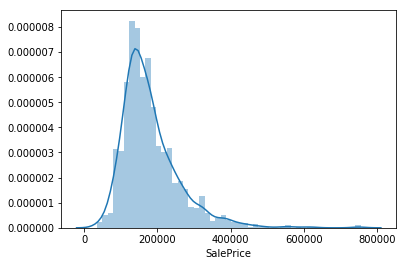

In [6]:
sns.distplot(df_train['SalePrice']);

In [7]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Find Correlation between variables

In [34]:
# scatter plot var->SalePrice
def relation_with_saleprice(var, df, ylim=800000):
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    if ylim:
        data.plot.scatter(x=var, y='SalePrice', ylim=(0, ylim))
    else:
        data.plot.scatter(x=var, y='SalePrice')

# box plot var->SalePrice (categorical variable)
def relation_with_saleprice_cat_var(var, df, ylim=800000):
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    if ylim:
        fig.axis(ymin=0, ymax=ylim);

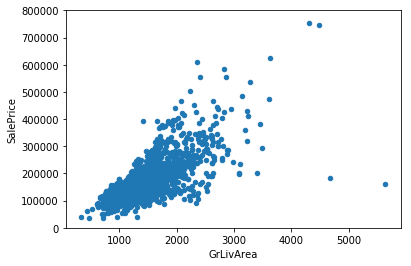

In [9]:
relation_with_saleprice('GrLivArea', df_train)

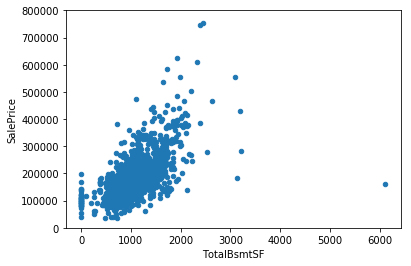

In [10]:
relation_with_saleprice('TotalBsmtSF', df_train)

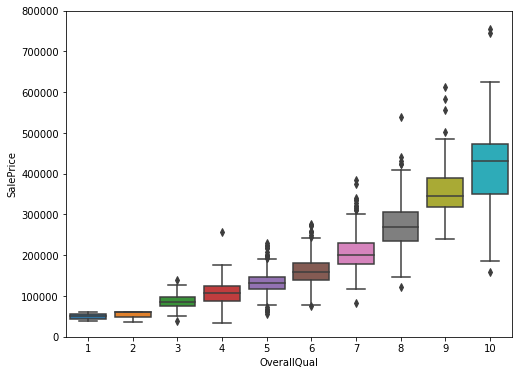

In [11]:
relation_with_saleprice_cat_var('OverallQual', df_train)

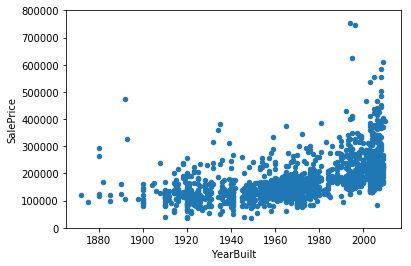

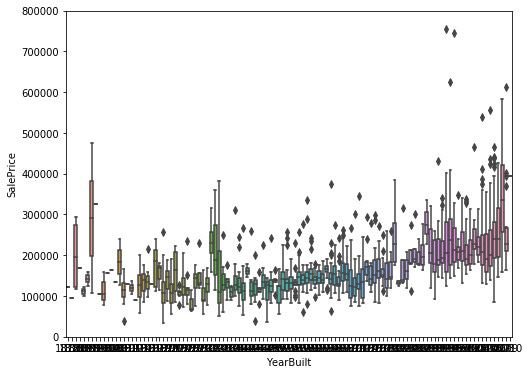

In [12]:
relation_with_saleprice('YearBuilt', df_train)
relation_with_saleprice_cat_var('YearBuilt', df_train)

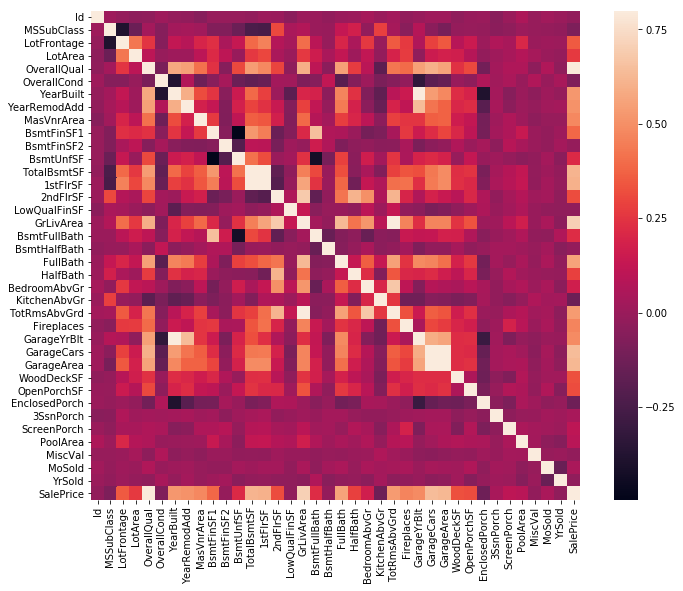

In [13]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

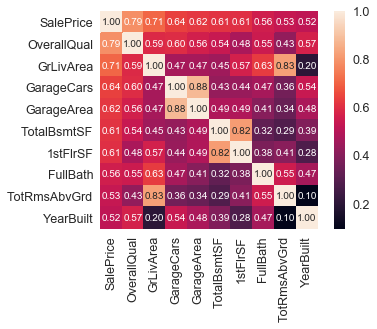

In [14]:
# saleprice correlation matrix
# Order columns by correlation with SalePrice and pick the column names.
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
# Correlation matrix values.
top_10_corr = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(top_10_corr, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
- 'FullBath'?? Really?
- 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
- Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.


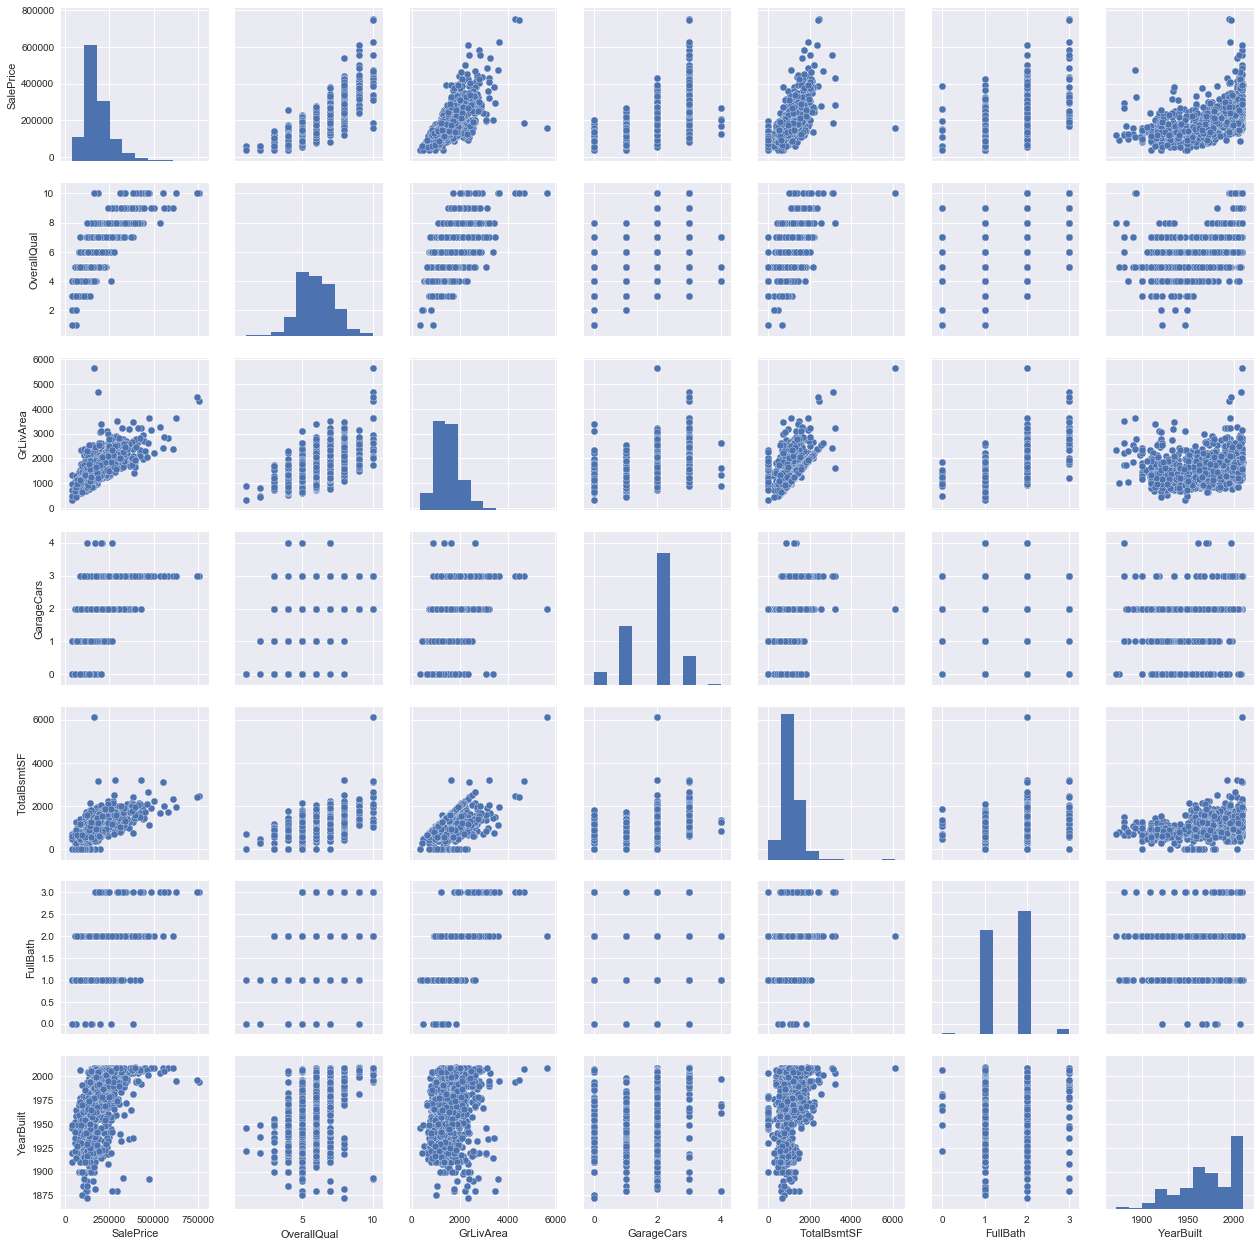

In [15]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

## Missing data
Important questions when thinking about missing data:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because
missing data can imply a reduction of the sample size. This can prevent
us from proceeding with the analysis. Moreover, from a substantive perspective,
we need to ensure that the missing data process is not biased and hidding
an inconvenient truth.

In [16]:
total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5 problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [17]:
# dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()  #just checking that there's no missing data missing...

0

In [18]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
saleprice_scaled_sorted = saleprice_scaled[saleprice_scaled[:, 0].argsort()]
smallest_sss = saleprice_scaled_sorted[:10, 0]
largest_sss = saleprice_scaled_sorted[-10:, 0]
print ("largest: \n{}".format(largest_sss))
print ("smallest: \n{}".format(smallest_sss))

largest: 
[3.82758058 4.0395221  4.49473628 4.70872962 4.728631   5.06034585
 5.42191907 5.58987866 7.10041987 7.22629831]
smallest: 
[-1.83820775 -1.83303414 -1.80044422 -1.78282123 -1.77400974 -1.62295562
 -1.6166617  -1.58519209 -1.58519209 -1.57269236]


How 'SalePrice' looks with her new clothes:

Low range values are similar and not too far from 0.
High range values are far from 0 and the 7.something values are really out of range.
For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

## Bivariate analysis

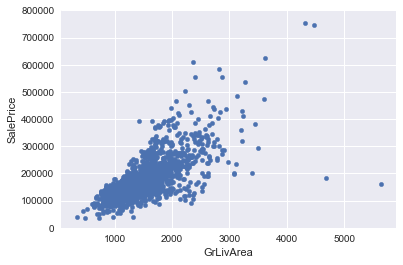

In [19]:
# bivariate analysis saleprice/grlivarea
relation_with_saleprice('GrLivArea', df_train)

What has been revealed:

- The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
- The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [20]:
# delete outliers
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [21]:
df_train = df_train.sort_values(by='GrLivArea', ascending=False)[2:]

In [22]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


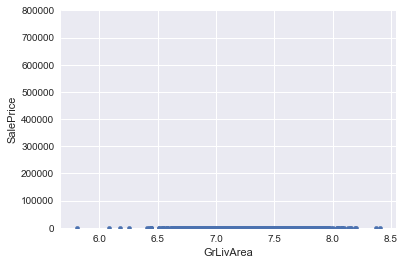

In [33]:
# bivariate analysis saleprice/grlivarea
relation_with_saleprice('GrLivArea', df_train, ylim=None)

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

## Getting hard core

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:
- Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.
- Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
- Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.
- Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?



#### In the search for normality
The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:
- Histogram - Kurtosis and skewness.
- Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

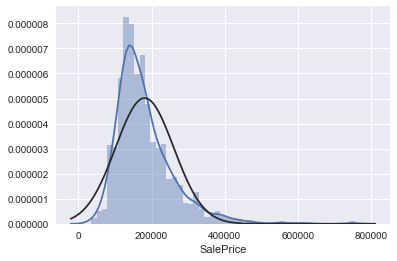

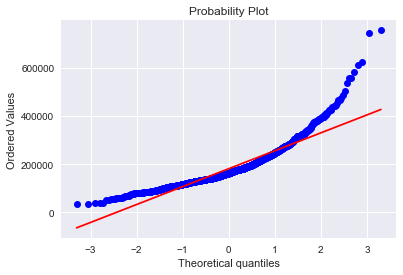

In [24]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.



In [25]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

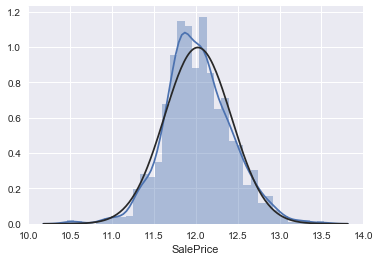

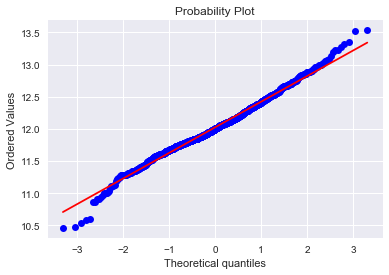

In [26]:
# transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

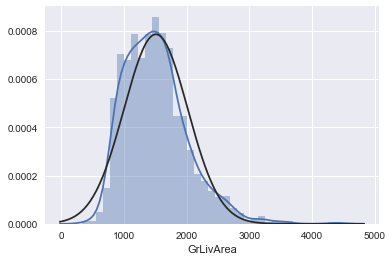

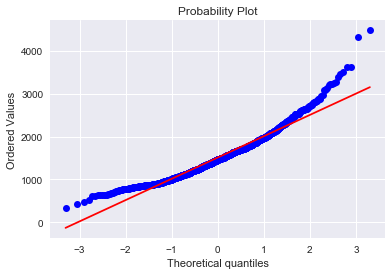

In [27]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

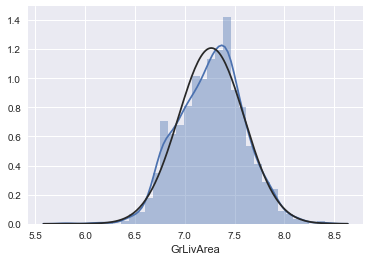

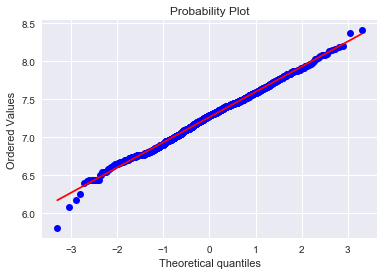

In [28]:
# data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
# transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

- Something that, in general, presents skewness.
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

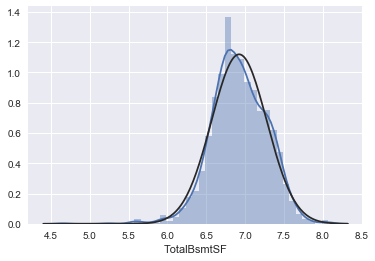

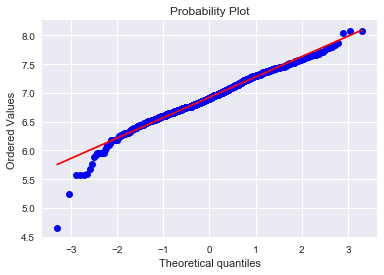

In [29]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
# transform data
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
# histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

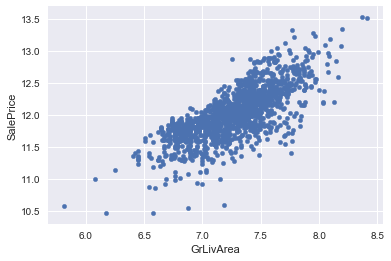

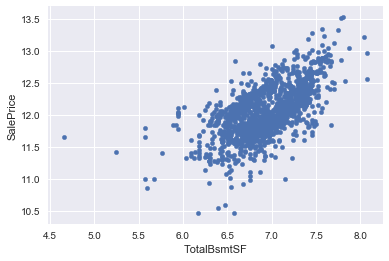

In [35]:
relation_with_saleprice('GrLivArea', df_train, ylim=None)
fig = plt.figure()
relation_with_saleprice('TotalBsmtSF', df_train[df_train['TotalBsmtSF'] > 0], ylim=None)

In [36]:
# Convert categorical variable into dummy/indicator variables
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
df_train = pd.get_dummies(df_train)